First, we create our input data according to the instructions in the question and load all required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(39)

In [2]:
%matplotlib inline

In [3]:
a = np.arange(0,21)
b = 0.2*a - 2
print(b.shape)

(21,)


In [4]:
x = []
for i in range(0,21):
    for j in range(0,21):
        xi = b[i]
        xj = b[j]
        x.append([xi,xj])
        
x = np.array(x)
print(x.shape)

(441, 2)


Now, we find our output values based on the mapping defined in the question.

In [5]:
y = []
for i in range(0,441):
    f = (x[i][0]*x[i][0]) + (x[i][1]*x[i][1])
    if f <= 1:
        y.append(1)
    else:
        y.append(-1)

print(y)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 

In [6]:
y = np.array(y)
print(y.shape, '\t', np.unique(y, return_counts=True))

(441,) 	 (array([-1,  1]), array([364,  77], dtype=int64))


Our ouput has the values of -1 for 364 inputs and 1 for 77 inputs. Let us plot a graph between the two features of our inputs with the color of the dot based on their output.

Text(0, 0.5, 'xj')

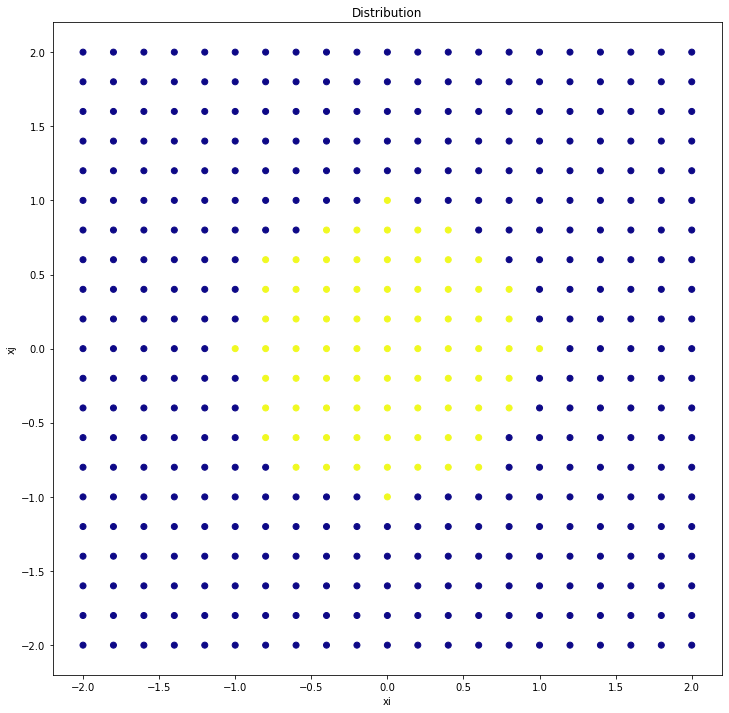

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x[:,0], x[:,1], c=y, cmap='plasma')
ax.set_title("Distribution")
ax.set_xlabel("xi")
ax.set_ylabel("xj")

The yellow dots correspond to the output of 1 and the blue to the output of -1.  
Now, we split our dataset into training and test set in a ratio 8:2.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(X_train.shape, '\t', X_test.shape)
print(y_train.shape, '\t', y_test.shape)

(352, 2) 	 (89, 2)
(352,) 	 (89,)


## Design of RBF Network
Since we need to train our RBF network on different parameters, let us define one class that can be reused for all our requirements

In [9]:
def rbf(x, c, s):
    return np.exp( (np.linalg.norm(x-c)**2) * -1 / (2*s**2))

In [10]:
class RBFN:
    #RBF Network Class
    def __init__(self, num_centres, lr=0.1, epochs=100):
        """Initialization of hyperparameters"""
        self.lr = lr #learning rate
        self.epochs = epochs #number of epochs for training
        #randomly initialise weights
        self.w = np.random.randn(num_centres)
             
    def fit(self, train_ip, train_op, centres, std_dev):
        """Training phase"""
        self.hnodes = centres.shape[0]
        self.mse = []
        self.centres = centres
        self.stds = std_dev
        
        
        
        for epoch in range(self.epochs):
            #print("epoch: ",epoch+1,"/",self.epochs,"")
            calc_op = []
            
            for i in range(train_ip.shape[0]):
                
                #feedforward
                a = np.array( [ rbf(train_ip[i], c, s) for c, s, in zip(centres, std_dev) ] )
                F = a.T.dot(self.w)
                calc_op.append(F)
 
                #backpropagation
                error = train_op[i] - F
                self.w = self.w + (self.lr * a * error)
            
            calc_op = np.array(calc_op)
            mse = np.square(y_train - calc_op).mean()
            #print("Training Mean Squared Error: ",mse)
            self.mse.append(mse)
            
        print("Final training accuracy: ", self.mse[self.epochs-1])
        
    def predict(self, test_ip):
        """Prediction of unseen data"""
        test_op = []
        for i in range(test_ip.shape[0]):
            a = np.array( [ rbf(test_ip[i], c, s) for c, s, in zip(self.centres, self.stds) ] )
            F = a.T.dot(self.w)
            test_op.append(F)
            
        return np.array(test_op)

The `fit()` function will train our network and store the mean squared error (MSE) at each epoch. Only the final training MSE will be printed to limit the length of the document, but the MSE at each epoch can be printed easily by uncommenting two lines in the function. Alternatively, the object parameter `mse` can be printed for the exact same result.  
The `predict()` function will return the predicted output for the passed input. We use this to calculate the test MSE.

## Part 1.
Here, the training data itself is passed as the centres to the kernel functions, meaning that we will have 352 neurons in the hidden layer corresponding to 352 Gaussian RBFs with 352 different centres. The standard deviation is kept constant for all functions. We will train 9 networks by varying the spread/standard deviation from 0.1 to 0.5 in steps of 0.05.

In [11]:
std_range = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

In [12]:
train_mse = []
test_mse = []

for i in std_range:
    start = time.time()
    rbfnn = RBFN(num_centres=X_train.shape[0])
    rbfnn.fit(train_ip=X_train, train_op=y_train, centres=X_train, std_dev=np.repeat(i,X_train.shape[0]))
    train_mse.append(rbfnn.mse[99])
    print(time.time() - start, "s")
    
    y_pred = rbfnn.predict(X_test)
    test_mse.append( np.square(y_test - y_pred).mean() ) 
    
print("Test MSE across all runs: ", test_mse)
print()
print( "Minimum Training MSE is {} for a spread of {}".format(min(train_mse), std_range[np.argmin(train_mse)]) )
print( "Minimum Test MSE is {} for a spread of {}".format(min(test_mse), std_range[np.argmin(test_mse)]) )

Final training accuracy:  1.1783380309093161e-05
134.0458950996399 s
Final training accuracy:  0.008798296289426081
133.7371039390564 s
Final training accuracy:  0.03686986997135509
133.40853929519653 s
Final training accuracy:  0.05584865443386083
134.63791418075562 s
Final training accuracy:  0.07492034150078286
134.05301928520203 s
Final training accuracy:  0.09562489543856399
134.04136872291565 s
Final training accuracy:  0.13509255102005158
133.82563710212708 s
Final training accuracy:  0.1910492991502042
135.3975546360016 s
Final training accuracy:  0.3269998540441984
133.7943353652954 s
Test MSE across all runs:  [0.4367970131568037, 0.12341240582041176, 0.10434298523680716, 0.11113891255494662, 0.11700106537062725, 0.1300149979998876, 0.13891228809938772, 0.27198872215273634, 0.6758696150457517]

Minimum Training MSE is 1.1783380309093161e-05 for a spread of 0.1
Minimum Test MSE is 0.10434298523680716 for a spread of 0.2


Text(0, 0.5, 'Test MSE')

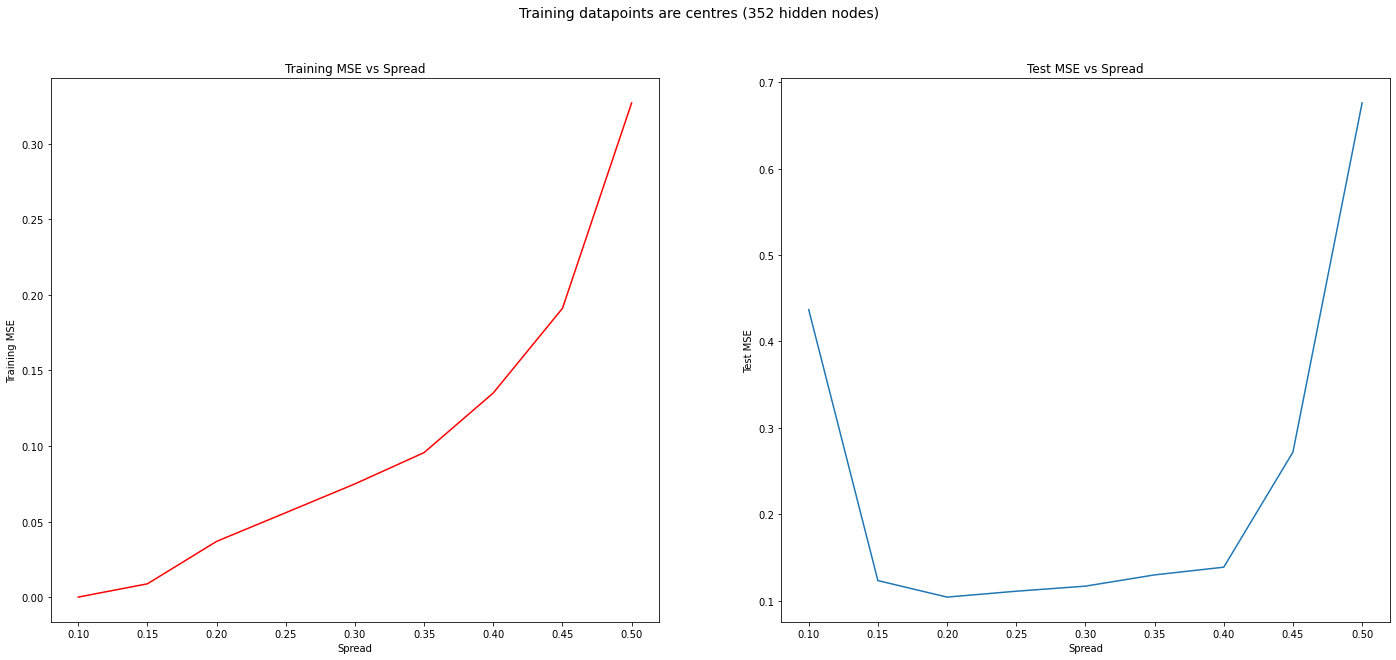

In [13]:
fig, (a1,a2) = plt.subplots(1,2,figsize=(24,10))
fig.suptitle("Training datapoints are centres (352 hidden nodes)", fontsize=14)

a1.plot(std_range, train_mse, c='red')
a1.set_title("Training MSE vs Spread")
a1.set_xlabel("Spread")
a1.set_ylabel("Training MSE")

a2.plot(std_range, test_mse)
a2.set_title("Test MSE vs Spread")
a2.set_xlabel("Spread")
a2.set_ylabel("Test MSE")

From the above plots, we can clearly see that the training MSE curve keeps on increasing as the spread is increased whereas the test MSE curve decreases to a minimum at `std_dev=0.2` then starts increasing. This also shows the importance of having a test dataset while gauging the performance of any neural network model. 

## Part 2.
Here, we need to choose 150 centres for our kernle functions i.e. 150 nodes in the hidden layer. The choice of these is done in 2 different ways.

### a) Random Selection
Here, we randomly select 150 centres from our training dataset.

In [14]:
index = np.random.choice(X_train.shape[0],150)
rnd_centres = X_train[index]
print(rnd_centres.shape)

(150, 2)


In [15]:
rnd_train_mse = []
rnd_test_mse = []

for i in std_range:
    start = time.time()
    rbfnn2 = RBFN(num_centres=rnd_centres.shape[0])
    rbfnn2.fit(train_ip=X_train, train_op=y_train, centres=rnd_centres, std_dev=np.repeat(i,rnd_centres.shape[0]))
    rnd_train_mse.append(rbfnn2.mse[99])
    print(time.time() - start, "s")
    
    y_pred = rbfnn2.predict(X_test)
    rnd_test_mse.append( np.square(y_test - y_pred).mean() ) 
    
print(rnd_train_mse, '\n', rnd_test_mse)

Final training accuracy:  0.5098930048666094
58.624571800231934 s
Final training accuracy:  0.25172513814068687
57.8318817615509 s
Final training accuracy:  0.13364929199052292
57.70523190498352 s
Final training accuracy:  0.09080509555292884
57.95391583442688 s
Final training accuracy:  0.08316961687886391
57.73911499977112 s
Final training accuracy:  0.09204666166601774
57.440224170684814 s
Final training accuracy:  0.10104923877582644
57.31585764884949 s
Final training accuracy:  0.10815001117274213
57.4719922542572 s
Final training accuracy:  0.12216480535066747
57.54961943626404 s
[0.5098930048666094, 0.25172513814068687, 0.13364929199052292, 0.09080509555292884, 0.08316961687886391, 0.09204666166601774, 0.10104923877582644, 0.10815001117274213, 0.12216480535066747] 
 [0.7494216277102739, 0.35096147529385413, 0.1836283662756662, 0.11441686920433368, 0.08656090163976445, 0.0889170721127328, 0.0909129131136144, 0.09825743902090946, 0.12204123302502587]


In [16]:
print("Test MSE across all runs: ", rnd_test_mse)
print()
print( "Minimum Training MSE is {} for a spread of {}".format(min(rnd_train_mse), std_range[np.argmin(rnd_train_mse)]) )
print( "Minimum Test MSE is {} for a spread of {}".format(min(rnd_test_mse), std_range[np.argmin(rnd_test_mse)]) )

Test MSE across all runs:  [0.7494216277102739, 0.35096147529385413, 0.1836283662756662, 0.11441686920433368, 0.08656090163976445, 0.0889170721127328, 0.0909129131136144, 0.09825743902090946, 0.12204123302502587]

Minimum Training MSE is 0.08316961687886391 for a spread of 0.3
Minimum Test MSE is 0.08656090163976445 for a spread of 0.3


Text(0, 0.5, 'Test MSE')

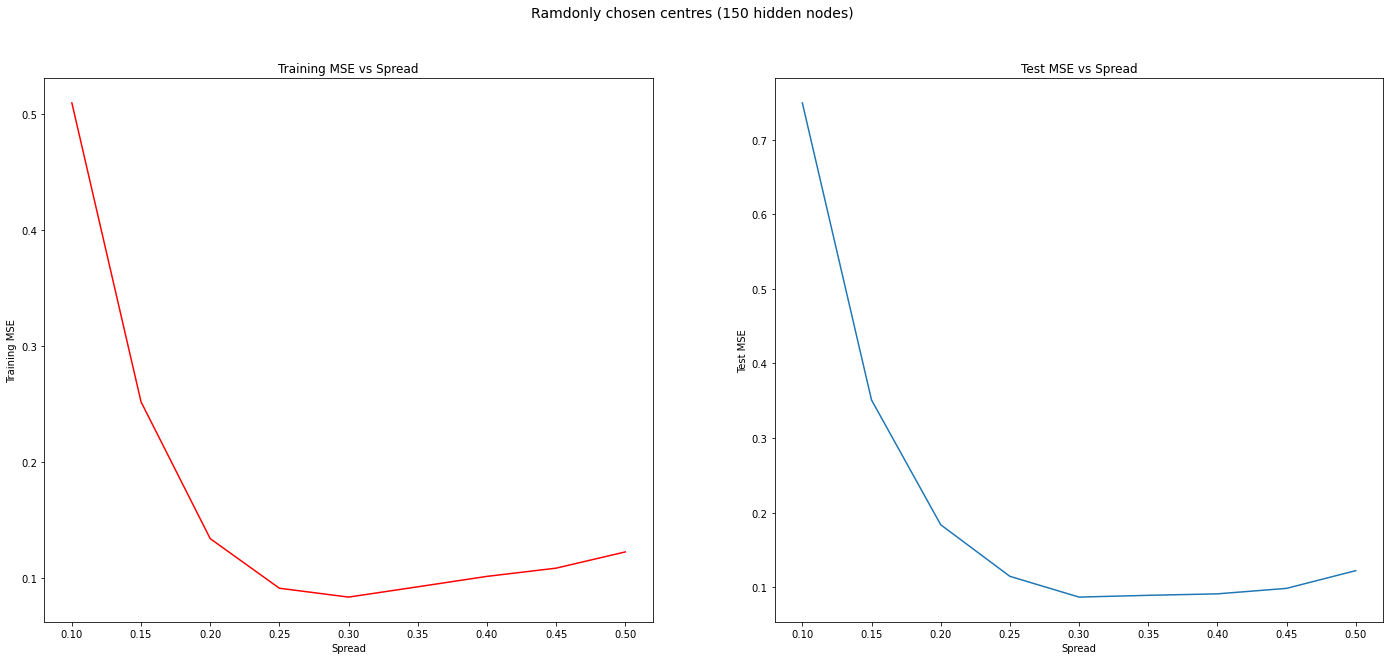

In [17]:
fig, (b1,b2) = plt.subplots(1,2,figsize=(24,10))
fig.suptitle("Ramdonly chosen centres (150 hidden nodes)", fontsize=14)

b1.plot(std_range, rnd_train_mse, c='red')
b1.set_title("Training MSE vs Spread")
b1.set_xlabel("Spread")
b1.set_ylabel("Training MSE")

b2.plot(std_range, rnd_test_mse)
b2.set_title("Test MSE vs Spread")
b2.set_xlabel("Spread")
b2.set_ylabel("Test MSE")

We see different curve characteristics here when compared to our previous model. Both the training MSE and test MSE start at a very high value, fall drastically to a minimum error at `std_dev=0.3` and the rise slowly.

### b) K-Means Clustering

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=150, max_iter=100, random_state=39)
km.fit(X_train)
km_centres= km.cluster_centers_
print(km_centres.shape)

(150, 2)


In [19]:
km_train_mse = []
km_test_mse = []

for i in std_range:
    start = time.time()
    rbfnn3 = RBFN(num_centres=km_centres.shape[0])
    rbfnn3.fit(train_ip=X_train, train_op=y_train, centres=km_centres, std_dev=np.repeat(i,km_centres.shape[0]))
    km_train_mse.append(rbfnn3.mse[99])
    print(time.time() - start, "s")
    
    y_pred = rbfnn3.predict(X_test)
    km_test_mse.append( np.square(y_test - y_pred).mean() ) 
    
print(km_train_mse, '\n', km_test_mse)

Final training accuracy:  0.12252115561828986
57.283119440078735 s
Final training accuracy:  0.06845183320759828
57.08398938179016 s
Final training accuracy:  0.05932154595754124
56.7667920589447 s
Final training accuracy:  0.060292231175170595
57.018080949783325 s
Final training accuracy:  0.06567402478599492
57.189478158950806 s
Final training accuracy:  0.0769101551507962
57.3020339012146 s
Final training accuracy:  0.08992759025080631
57.03237271308899 s
Final training accuracy:  0.10382202061523146
56.87865161895752 s
Final training accuracy:  0.12525284673259793
56.76780390739441 s
[0.12252115561828986, 0.06845183320759828, 0.05932154595754124, 0.060292231175170595, 0.06567402478599492, 0.0769101551507962, 0.08992759025080631, 0.10382202061523146, 0.12525284673259793] 
 [0.5913032183637792, 0.18347771877385846, 0.09016506567308935, 0.08753702691737159, 0.08750440813796628, 0.08100486914512052, 0.0719893251832387, 0.07991713171177312, 0.11944909316108651]


In [20]:
print("Test MSE across all runs: ", km_test_mse)
print()
print( "Minimum Training MSE is {} for a spread of {}".format(min(km_train_mse), std_range[np.argmin(km_train_mse)]) )
print( "Minimum Test MSE is {} for a spread of {}".format(min(km_test_mse), std_range[np.argmin(km_test_mse)]) )

Test MSE across all runs:  [0.5913032183637792, 0.18347771877385846, 0.09016506567308935, 0.08753702691737159, 0.08750440813796628, 0.08100486914512052, 0.0719893251832387, 0.07991713171177312, 0.11944909316108651]

Minimum Training MSE is 0.05932154595754124 for a spread of 0.2
Minimum Test MSE is 0.0719893251832387 for a spread of 0.4


Text(0, 0.5, 'Test MSE')

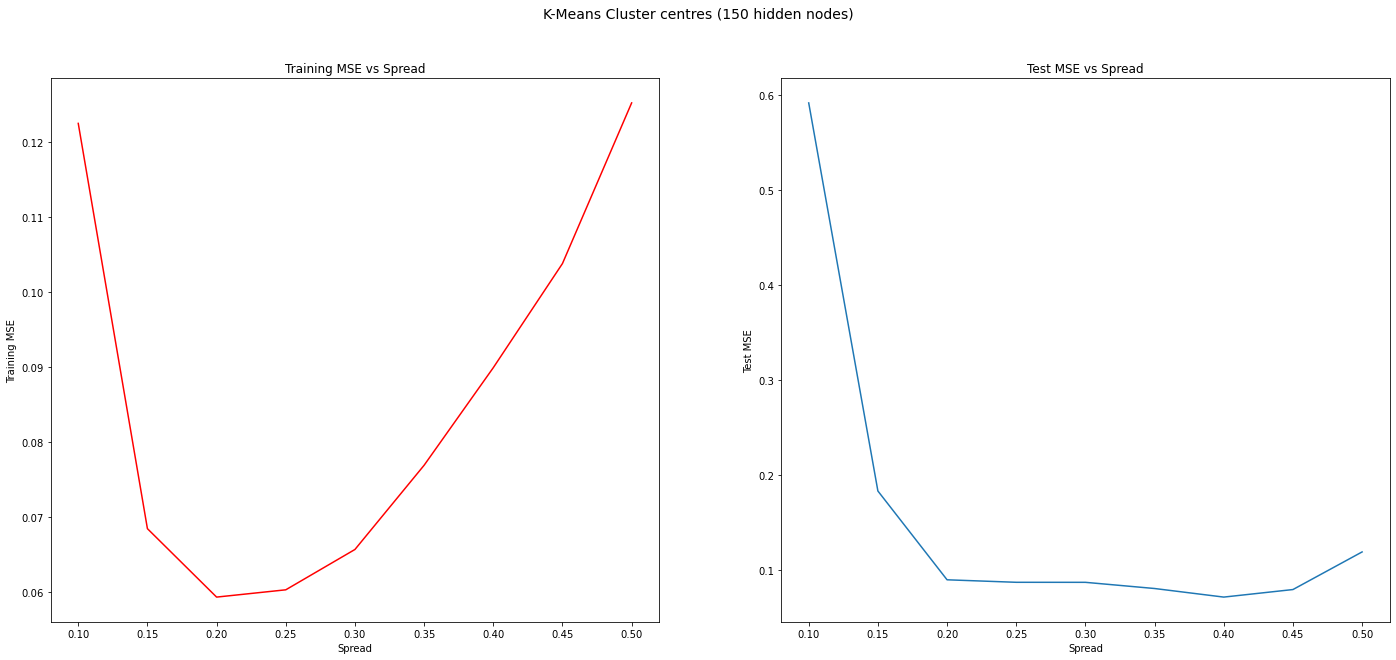

In [21]:
fig, (c1,c2) = plt.subplots(1,2,figsize=(24,10))
fig.suptitle("K-Means Cluster centres (150 hidden nodes)", fontsize=14)

c1.plot(std_range, km_train_mse, c='red')
c1.set_title("Training MSE vs Spread")
c1.set_xlabel("Spread")
c1.set_ylabel("Training MSE")

c2.plot(std_range, km_test_mse)
c2.set_title("Test MSE vs Spread")
c2.set_xlabel("Spread")
c2.set_ylabel("Test MSE")

Here, our training and test curves follow very different paths as well as range in erro values obtained. The training MSE curve has a V-shape characteristic with its minimum at around 0.2. The test MSE curve falls from a very high error value, stabilises somewhat between `std_dev=0.2 to 0.4` the shows signs of rising gradually.

## Result Comparison

Text(0, 0.5, 'Mean Squared Error')

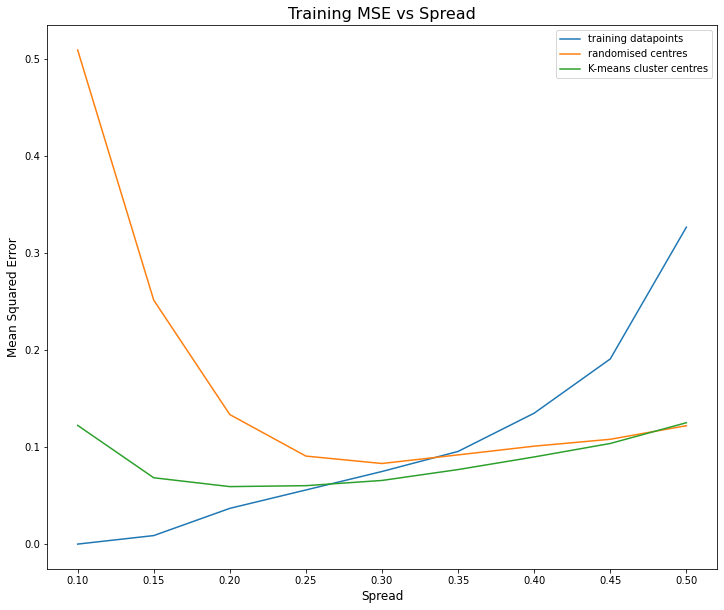

In [22]:
plt.figure(figsize=(12,10))
plt.plot(std_range, train_mse, label="training datapoints")
plt.plot(std_range, rnd_train_mse, label="randomised centres")
plt.plot(std_range, km_train_mse, label="K-means cluster centres")
plt.legend()
plt.title("Training MSE vs Spread", fontsize=16)
plt.xlabel("Spread", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)

Here, training datapoints < K-means < randomised centres if the minimum error possible irrespective of spread is considered. This comparison holds true till a spread of 0.25, after which K-means becomes the least. If we were to just look at training errors, we would take `std_dev=0.1` as our best value.

Text(0, 0.5, 'Mean Squared Error')

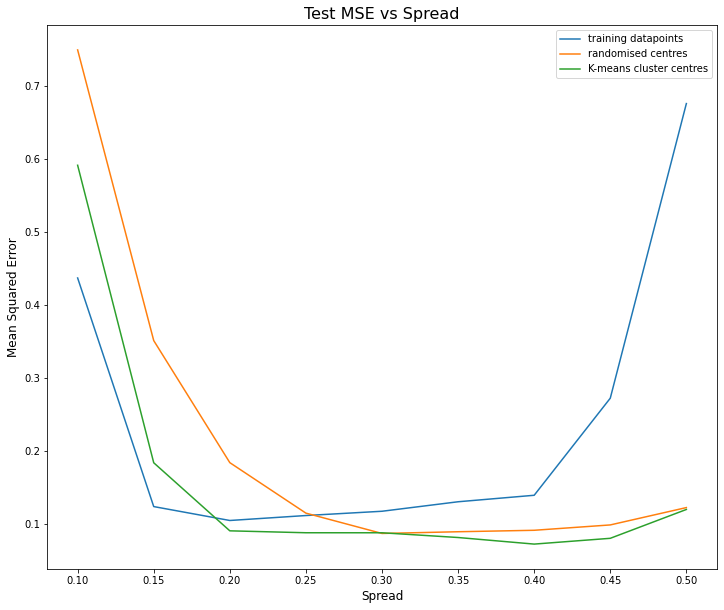

In [23]:
plt.figure(figsize=(12,10))
plt.plot(std_range, test_mse, label="training datapoints")
plt.plot(std_range, rnd_test_mse, label="randomised centres")
plt.plot(std_range, km_test_mse, label="K-means cluster centres")
plt.legend()
plt.title("Test MSE vs Spread", fontsize=16)
plt.xlabel("Spread", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)

Throughout all the chosen spread values, the centres obtained from K-means clustering give the least mean squared error on the test dataset. Among this, `std_dev=0.4` is the best value. This is in sharp contrast to our observation from the previous Training MSE vs Spread graph, showing the importance of testing when comparing the performance of different parameters or methods in the field of machine learning.

## Best Model: 
### RBF Network with 150 hidden nodes corresponding to 150 Gaussian kernel functions with a constant spread of 0.4 and centres found using K-Means clustering